In [1]:
# Imports

import pandas as pd

In [2]:
df = pd.read_csv('2018-06-06-pdb-intersect-pisces.csv')
df.head()

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCBCCCCCCCCCCCCCC,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCBCCSCCCEECC,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24
2,1O06,A,EEDPDLKAAIQESLREAEEA,CCCHHHHHHHHHHHHHHHTC,CCCHHHHHHHHHHHHHHHCC,20,False,XRAY,1.45,0.19,0.22
3,1QOW,D,CTFTLPGGGGVCTLTSECI*,CCTTSCTTCSSTTSSTTCCC,CCCCCCCCCCCCCCCCCCCC,20,True,XRAY,1.06,0.14,1.00
4,1RDQ,I,TTYADFIASGRTGRRNAIHD,CHHHHHHTSSCSSCCCCEEC,CHHHHHHCCCCCCCCCCEEC,20,False,XRAY,1.26,0.13,0.16


In [3]:
df.drop_duplicates() #remove duplicates if any in the dataset
df.dropna() #drop NaN values from the dataset if any
df.info() #analyse the columns and entries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9078 entries, 0 to 9077
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pdb_id         9078 non-null   object 
 1   chain_code     9078 non-null   object 
 2   seq            9078 non-null   object 
 3   sst8           9078 non-null   object 
 4   sst3           9078 non-null   object 
 5   len            9078 non-null   int64  
 6   has_nonstd_aa  9078 non-null   bool   
 7   Exptl.         9078 non-null   object 
 8   resolution     9078 non-null   float64
 9   R-factor       9078 non-null   float64
 10  FreeRvalue     9078 non-null   float64
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 718.2+ KB


Everything looks fine!

In [4]:
df = df.drop(columns='sst8') #Remove sst8 because we do not care about it, we look at sst3.
df.head()

,pdb_id,chain_code,seq,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24
2,1O06,A,EEDPDLKAAIQESLREAEEA,CCCHHHHHHHHHHHHHHHCC,20,False,XRAY,1.45,0.19,0.22
3,1QOW,D,CTFTLPGGGGVCTLTSECI*,CCCCCCCCCCCCCCCCCCCC,20,True,XRAY,1.06,0.14,1.00
4,1RDQ,I,TTYADFIASGRTGRRNAIHD,CHHHHHHCCCCCCCCCCEEC,20,False,XRAY,1.26,0.13,0.16


In [5]:
# NLP: Tokenization, Bag-of-Words, Word2Vec, Embedding
df['tokens'] = df['seq'].apply(lambda x: list(x)) #Split invidual characters into tokens
df['output'] = df['sst3'].apply(lambda x: list(x))
df.head()

,pdb_id,chain_code,seq,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue,tokens,output
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27,"[N, P, V, V, H, F, F, K, N, I, V, T, P, R, T, ...","[C, C, C, C, C, E, C, C, C, C, C, C, C, C, C, ..."
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24,"[D, L, D, L, E, M, L, A, P, Y, I, P, M, D, D, ...","[C, C, C, C, C, C, C, C, C, E, C, C, C, C, C, ..."
2,1O06,A,EEDPDLKAAIQESLREAEEA,CCCHHHHHHHHHHHHHHHCC,20,False,XRAY,1.45,0.19,0.22,"[E, E, D, P, D, L, K, A, A, I, Q, E, S, L, R, ...","[C, C, C, H, H, H, H, H, H, H, H, H, H, H, H, ..."
3,1QOW,D,CTFTLPGGGGVCTLTSECI*,CCCCCCCCCCCCCCCCCCCC,20,True,XRAY,1.06,0.14,1.00,"[C, T, F, T, L, P, G, G, G, G, V, C, T, L, T, ...","[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ..."
4,1RDQ,I,TTYADFIASGRTGRRNAIHD,CHHHHHHCCCCCCCCCCEEC,20,False,XRAY,1.26,0.13,0.16,"[T, T, Y, A, D, F, I, A, S, G, R, T, G, R, R, ...","[C, H, H, H, H, H, H, C, C, C, C, C, C, C, C, ..."


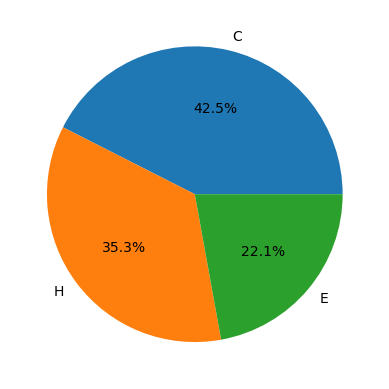

In [6]:
#Exploratory Data Analysis
from nltk.probability import FreqDist
import matplotlib.pyplot as plt


fdist = FreqDist() #Frequency dictionary

for row in df['output']:
    for word in row:
        fdist[word] += 1 #update counts for each of the three letters

counts = fdist.most_common(3)

letters = []
numbers = []
for index, total in counts: #split into x,y to plot 
    letters.append(index)
    numbers.append(total)

#Source: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
plt.pie(numbers, labels = letters, autopct='%1.1f%%')
plt.show()


In [7]:
from gensim.corpora import Dictionary

dict = Dictionary(df['tokens']) #create a dictionary of all the tokens

freq_dist = {}

for index, label in dict.items(): #loop through label by label

    label_freq = FreqDist() #unique frequency distribution for each label

    for input, output in zip(df['tokens'], df['output']): #source: https://www.geeksforgeeks.org/python-iterate-multiple-lists-simultaneously/
        for i_w, o_w in zip(input, output): #input_word, output_word
            if i_w == label: #only add corresponding output for correct label
                label_freq[o_w] += 1

    freq_dist[label] = label_freq

print(freq_dist)




{'F': FreqDist({'H': 31875, 'E': 28754, 'C': 27852}), 'H': FreqDist({'C': 35699, 'H': 16347, 'E': 11578}), 'I': FreqDist({'E': 47058, 'H': 44731, 'C': 29981}), 'K': FreqDist({'C': 51860, 'H': 50315, 'E': 22256}), 'N': FreqDist({'C': 55936, 'H': 25751, 'E': 13436}), 'P': FreqDist({'C': 72309, 'H': 19511, 'E': 9995}), 'Q': FreqDist({'H': 37299, 'C': 31785, 'E': 14050}), 'R': FreqDist({'H': 47317, 'C': 41850, 'E': 22993}), 'S': FreqDist({'C': 73981, 'H': 38857, 'E': 25705}), 'T': FreqDist({'C': 54784, 'H': 32582, 'E': 32379}), 'V': FreqDist({'E': 63467, 'H': 46448, 'C': 40003}), 'A': FreqDist({'H': 89140, 'C': 62292, 'E': 30635}), 'D': FreqDist({'C': 73575, 'H': 40908, 'E': 16544}), 'E': FreqDist({'H': 70250, 'C': 53890, 'E': 22786}), 'L': FreqDist({'H': 92959, 'C': 57620, 'E': 50540}), 'M': FreqDist({'H': 20142, 'C': 19896, 'E': 10727}), 'Y': FreqDist({'H': 27621, 'E': 24970, 'C': 24883}), '*': FreqDist({'C': 115, 'H': 38, 'E': 3}), 'C': FreqDist({'C': 10278, 'H': 8034, 'E': 7901}), 'G':

In [8]:
#Function for label freq dist

def label_freq_dist(token):

    ## check if token is valid
    if token in freq_dist:
        token_freq = freq_dist[token] 
    else:
        return "Not valid token"

    indexes = []
    values = []
    for idx, value in token_freq.items():
        indexes.append(idx)
        values.append(value)
    plt.pie(values, labels=indexes, autopct='%1.1f%%') #show pie chart
    plt.show()
    return token_freq.items() #return numbers for user 



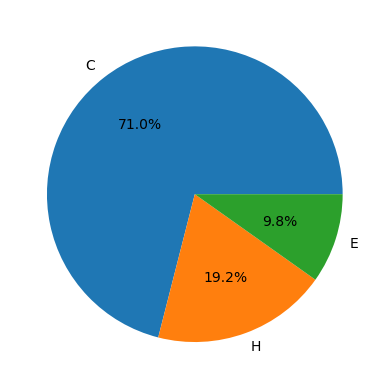

dict_items([('C', 72309), ('H', 19511), ('E', 9995)])

In [9]:
label_freq_dist('P')

In [21]:
#Padding to get uniform length and encoding characters

#Source: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(char_level=True) #Tokenizer
tokenizer.fit_on_texts(df['tokens']) #Fit on text/list
df['tokens_int'] = tokenizer.texts_to_sequences(df['tokens']) #Convert list to encoded integers

output_mapping = {'C': 30, 'H': 40, 'E': 50} #Mapped to high numbers to efficiently differentiate with the amino acids
df['outputs_int'] = df['output'].apply(lambda x: [output_mapping[label] for label in x])



max_length = df['len'].max() #max length according to dataset

from tensorflow.keras.preprocessing.sequence import pad_sequences

#Pad input tokens
padded_tokens = pad_sequences(df['tokens_int'].to_list(), maxlen=max_length, padding='post', value=0)
padded_outputs = pad_sequences(df['outputs_int'].to_list(), maxlen=max_length, padding='post', value=0)


assert len(padded_tokens[0]) == max_length
assert len(padded_outputs[0]) == max_length #ensure padding is done correctly




In [22]:
df.head()

,pdb_id,chain_code,seq,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue,tokens,output,tokens_int,outputs_int
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27,"[N, P, V, V, H, F, F, K, N, I, V, T, P, R, T, ...","[C, C, C, C, C, E, C, C, C, C, C, C, C, C, C, ...","[13, 12, 4, 4, 17, 14, 14, 8, 13, 9, 4, 10, 12...","[30, 30, 30, 30, 30, 50, 30, 30, 30, 30, 30, 3..."
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24,"[D, L, D, L, E, M, L, A, P, Y, I, P, M, D, D, ...","[C, C, C, C, C, C, C, C, C, E, C, C, C, C, C, ...","[7, 1, 7, 1, 5, 18, 1, 2, 12, 16, 9, 12, 18, 7...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 50, 30, 3..."
2,1O06,A,EEDPDLKAAIQESLREAEEA,CCCHHHHHHHHHHHHHHHCC,20,False,XRAY,1.45,0.19,0.22,"[E, E, D, P, D, L, K, A, A, I, Q, E, S, L, R, ...","[C, C, C, H, H, H, H, H, H, H, H, H, H, H, H, ...","[5, 5, 7, 12, 7, 1, 8, 2, 2, 9, 15, 5, 6, 1, 1...","[30, 30, 30, 40, 40, 40, 40, 40, 40, 40, 40, 4..."
3,1QOW,D,CTFTLPGGGGVCTLTSECI*,CCCCCCCCCCCCCCCCCCCC,20,True,XRAY,1.06,0.14,1.00,"[C, T, F, T, L, P, G, G, G, G, V, C, T, L, T, ...","[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...","[20, 10, 14, 10, 1, 12, 3, 3, 3, 3, 4, 20, 10,...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3..."
4,1RDQ,I,TTYADFIASGRTGRRNAIHD,CHHHHHHCCCCCCCCCCEEC,20,False,XRAY,1.26,0.13,0.16,"[T, T, Y, A, D, F, I, A, S, G, R, T, G, R, R, ...","[C, H, H, H, H, H, H, C, C, C, C, C, C, C, C, ...","[10, 10, 16, 2, 7, 14, 9, 2, 6, 3, 11, 10, 3, ...","[30, 40, 40, 40, 40, 40, 40, 30, 30, 30, 30, 3..."


In [32]:
import tensorflow as tf

#Very simple LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=len(freq_dist)+1, output_dim=64, mask_zero = True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dense(51, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')


In [33]:
#Split data into Train and Test split:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_tokens, padded_outputs, test_size=0.3, random_state=42)



In [34]:
train_model = model.fit(X_train, y_train, batch_size=None, epochs=10, validation_split=0.3)

Epoch 1/10
139/139 [==============================] - 294s 2s/step - loss: 0.2127 - val_loss: 0.1561
Epoch 2/10
139/139 [==============================] - 294s 2s/step - loss: 0.1524 - val_loss: 0.1454
Epoch 3/10
139/139 [==============================] - 285s 2s/step - loss: 0.1453 - val_loss: 0.1409
Epoch 4/10
139/139 [==============================] - 318s 2s/step - loss: 0.1428 - val_loss: 0.1423
Epoch 5/10
139/139 [==============================] - 350s 3s/step - loss: 0.1419 - val_loss: 0.1387
Epoch 6/10
139/139 [==============================] - 300s 2s/step - loss: 0.1416 - val_loss: 0.1388
Epoch 7/10
139/139 [==============================] - 275s 2s/step - loss: 0.1412 - val_loss: 0.1390
Epoch 8/10
139/139 [==============================] - 280s 2s/step - loss: 0.1408 - val_loss: 0.1378
Epoch 9/10
139/139 [==============================] - 289s 2s/step - loss: 0.1404 - val_loss: 0.1370
Epoch 10/10
139/139 [==============================] - 286s 2s/step - loss: 0.1397 - val_lo

In [35]:
results = model.evaluate(X_test, y_test, batch_size=None)
print("test loss, test acc:", results)

86/86 [==============================] - 27s 319ms/step - loss: 0.1359
test loss, test acc: 0.13590596616268158


IGNORER ALT UNDER FORLØPEGIGGG


In [6]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary


dict = Dictionary(df['tokens'])
corpus = [dict.doc2bow(row) for row in df['tokens']]

model = TfidfModel(corpus)
vector = model[corpus[0]]
for id, score in vector:
    token = dict[id]
    print(token, score)




F 0.31836795451322486
H 0.34542743198858766
I 0.08838619296927532
K 0.08460335914808222
N 0.2778554324211898
P 0.7712446779234371
Q 0.11658060339151352
R 0.08568386580884284
S 0.04640150869292991
T 0.15840891451449032
V 0.2101205524863875


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['sst3'])

X_train, X_test, y_train, y_test = train_test_split(model[corpus], y, test_size=0.3, random_state=42)